<a href="https://colab.research.google.com/github/yasser97/PROJECTS/blob/main/First_Project_9_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **My first ML Project**

# **Load Data**

# **Data preparation**

In [3]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/refs/heads/master/delaney_solubility_with_descriptors.csv')
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


## **Data Separation As X and Y**

In [5]:
y=df['logS']
y

,logS
0,-2.180
1,-2.000
2,-1.740
3,-1.480
4,-3.040
...,...
1139,1.144
1140,-4.925
1141,-3.893
1142,-3.790


In [13]:
x=df.drop('logS',axis=1)
x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


## **Split Data for training and test**

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [20]:
X_train

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
107,3.14280,112.216,5.0,0.000000
378,-2.07850,142.070,0.0,0.000000
529,-0.47730,168.152,0.0,0.000000
546,-0.86740,154.125,0.0,0.000000
320,1.62150,100.161,2.0,0.000000
...,...,...,...,...
802,3.00254,250.301,1.0,0.842105
53,2.13860,82.146,3.0,0.000000
350,5.76304,256.348,0.0,0.900000
79,3.89960,186.339,10.0,0.000000


In [21]:
X_test

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
822,2.91000,172.268,7.0,0.000000
118,7.27400,360.882,1.0,0.666667
347,1.94040,145.161,0.0,0.909091
1123,1.98640,119.378,0.0,0.000000
924,1.70062,108.140,0.0,0.750000
...,...,...,...,...
1114,1.76210,478.513,4.0,0.000000
427,6.32820,276.338,0.0,1.000000
711,0.04430,218.205,5.0,0.000000
4,2.91890,187.375,1.0,0.000000


# **Model Bulding**

## **Linear Regression**

### **Training The Model**

In [25]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

### **Apply The Model To Make Prediction**

In [26]:
y_lr_train_pred=lr.predict(X_train)
y_lr_test_pred=lr.predict(X_test)


### **Evaluate Model preformance**


In [31]:
from sklearn.metrics import mean_squared_error ,r2_score
lr_train_mse=mean_squared_error(y_train,y_lr_train_pred)
lr_train_r2=r2_score(y_train,y_lr_train_pred)

lr_train_mse=mean_squared_error(y_train,y_lr_train_pred)
lr_train_r2=r2_score(y_train,y_lr_train_pred)

lr_test_mse=mean_squared_error(y_test,y_lr_test_pred)
lr_test_r2=r2_score(y_test,y_lr_test_pred)




In [55]:
lr_results=pd.DataFrame(['Linear Regression',lr_train_mse,lr_train_r2,lr_test_mse,lr_test_r2]).transpose()
lr_results.columns=['Method','MSE (Train)','R2 (Train)',' MSE (Test) ',' R2 (Test)']

In [56]:
lr_results

,Method,MSE (Train),R2 (Train),MSE (Test),R2 (Test)
0,Linear Regression,1.007536,0.764505,1.020695,0.789162


## **Random Forest**

### **Training The Model**

In [42]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(max_depth=2,random_state=100)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=2, random_state=100)

### **Apply The Model To Make Prediction**

In [43]:
y_rf_train_pred=rf.predict(X_train)
y_rf_test_pred=rf.predict(X_test)

### **Evalute Model Preformance**

In [44]:
from sklearn.metrics import mean_squared_error ,r2_score
rf_train_mse=mean_squared_error(y_train,y_rf_train_pred)
rf_train_r2=r2_score(y_train,y_rf_train_pred)

rf_train_mse=mean_squared_error(y_train,y_rf_train_pred)
rf_train_r2=r2_score(y_train,y_rf_train_pred)

rf_test_mse=mean_squared_error(y_test,y_rf_test_pred)
rf_test_r2=r2_score(y_test,y_rf_test_pred)


In [57]:
rf_results=pd.DataFrame(['Random Forest',rf_train_mse,rf_train_r2,rf_test_mse,rf_test_r2]).transpose()
rf_results.columns=['Method','MSE (Train)','R2 (Train)',' MSE (Test) ',' R2 (Test)']

In [58]:
rf_results

,Method,MSE (Train),R2 (Train),MSE (Test),R2 (Test)
0,Random Forest,1.028228,0.759669,1.407688,0.709223


## **Model Comparison between linear regression & Random Forest**

In [62]:
models=pd.concat([lr_results,rf_results],axis=0)
models

,Method,MSE (Train),R2 (Train),MSE (Test),R2 (Test)
0,Linear Regression,1.007536,0.764505,1.020695,0.789162
0,Random Forest,1.028228,0.759669,1.407688,0.709223


In [66]:
models.reset_index(drop=True)


,Method,MSE (Train),R2 (Train),MSE (Test),R2 (Test)
0,Linear Regression,1.007536,0.764505,1.020695,0.789162
1,Random Forest,1.028228,0.759669,1.407688,0.709223


# **Data Visualization of prediction Results**

Text(0.5, 0, 'Experimantel LogS')

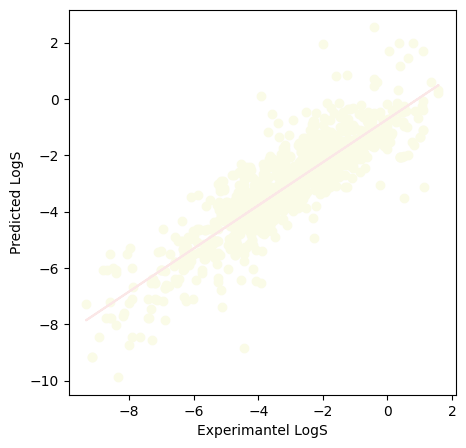

In [82]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train , y=y_lr_train_pred,c='#fafbe7' )
z=np.polyfit(y_train,y_lr_train_pred,1)
p=np.poly1d(z)
plt.plot(y_train,p(y_train),'#fbe7e7')
plt.plot()
plt.ylabel('Predicted LogS')
plt.xlabel('Experimantel LogS')